In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("downloads/NYPD_Year_To_Date_Complaints.csv")

In [3]:
data.head()

,BORO_NAME,DATE,TIME,CATEGORY,LOCATION OF OCCURANCE,OFFENCE DESCRIPTION,PREMISE TYPE,SUSPECT AGE GROUP,SUSPECT RACE,SUSPECT SEX,VICTIM AGE GROUP,VICTIM RACE,VICTIM SEX,"LATITUDE, LONGITUDE"
0,BRONX,03/04/2023,12:55:00,FELONY,INSIDE,ROBBERY,BANK,UNKNOWN,BLACK,M,18-24,WHITE HISPANIC,M,"(40.822882, -73.848929)"
1,STATEN ISLAND,05/19/2023,15:52:00,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,(null),<18,BLACK,M,<18,BLACK,M,NaN
2,BRONX,06/24/2023,14:35:00,VIOLATION,INSIDE,HARRASSMENT 2,(null),25-44,BLACK,M,45-64,BLACK,F,"(40.8673, -73.903374)"
3,MANHATTAN,04/01/2022,15:00:00,MISDEMEANOR,INSIDE,PETIT LARCENY,OTHER,25-44,ASIAN / PACIFIC ISLANDER,M,UNKNOWN,UNKNOWN,E,"(40.815904, -73.945123)"
4,MANHATTAN,12/29/2022,00:00:00,MISDEMEANOR,INSIDE,OFF. AGNST PUB ORD SENSBLTY &,RESIDENCE - APT. HOUSE,18-24,BLACK,M,18-24,BLACK HISPANIC,F,"(40.826268, -73.943126)"


In [7]:
data.replace({'(null)': pd.NA, 'UNKNOWN': pd.NA}, inplace=True)

In [10]:
(data.isna().sum()/(len(data)))*100

BORO_NAME                 0.158621
DATE                      0.000000
TIME                      0.000000
CATEGORY                  0.000000
LOCATION OF OCCURANCE    19.484243
OFFENCE DESCRIPTION       0.004784
PREMISE TYPE              2.838983
SUSPECT AGE GROUP        51.646750
SUSPECT RACE             40.022155
SUSPECT SEX              13.430518
VICTIM AGE GROUP         29.181833
VICTIM RACE              31.522871
VICTIM SEX                0.000000
LATITUDE, LONGITUDE       0.001840
dtype: float64

In [ ]:
# The percentage of missing values for LOCATION OF OCCURANCE ~19%, SUSPECT AGE GROUP ~ 52%, SUSPECT RACE~40% 
# VICTIM AGE GROUP ~ 29% and, VICTIM RACE ~32% are very high and can lead to issues when trying to model dataset..    

In [5]:
data.nunique()

BORO_NAME                    6
DATE                      1452
TIME                      1440
CATEGORY                     3
LOCATION OF OCCURANCE        6
OFFENCE DESCRIPTION         61
PREMISE TYPE                84
SUSPECT AGE GROUP           17
SUSPECT RACE                 8
SUSPECT SEX                  4
VICTIM AGE GROUP            22
VICTIM RACE                  8
VICTIM SEX                   5
LATITUDE, LONGITUDE      57854
dtype: int64

In [11]:
data = data.drop(['LATITUDE, LONGITUDE'], axis = 1)
#  Columns can be dropped if they will not add value to an analysis

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271717 entries, 0 to 271716
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   BORO_NAME              271286 non-null  object
 1   DATE                   271717 non-null  object
 2   TIME                   271717 non-null  object
 3   CATEGORY               271717 non-null  object
 4   LOCATION OF OCCURANCE  218775 non-null  object
 5   OFFENCE DESCRIPTION    271704 non-null  object
 6   PREMISE TYPE           264003 non-null  object
 7   SUSPECT AGE GROUP      131384 non-null  object
 8   SUSPECT RACE           162970 non-null  object
 9   SUSPECT SEX            235224 non-null  object
 10  VICTIM AGE GROUP       192425 non-null  object
 11  VICTIM RACE            186064 non-null  object
 12  VICTIM SEX             271717 non-null  object
dtypes: object(13)
memory usage: 26.9+ MB


In [97]:
data.describe(include='all').T

,count,unique,top,freq
BORO_NAME,271286,5,BROOKLYN,76380
DATE,271717,1452,05/03/2023,1729
TIME,271717,1440,12:00:00,6483
CATEGORY,271717,3,MISDEMEANOR,138769
LOCATION OF OCCURANCE,218775,5,INSIDE,143440
OFFENCE DESCRIPTION,271704,60,PETIT LARCENY,54112
PREMISE TYPE,264003,83,STREET,79658
SUSPECT AGE GROUP,131384,15,25-44,76344
SUSPECT RACE,162970,6,BLACK,81964
SUSPECT SEX,235224,3,M,136708


In [ ]:
# Out[97] shows the top values in the dataset. 
#  Brooklyn received most of the complaints with a frequency of over 76,000.
# The date 05/03/2023 has the highest frequency
# 60% of all offense described are classified as MISDEMEANOR and a good chunk of those were petit larceny
# Most of the suspects where Black and Male and most of the victims were black females. Although, 
# the column suspect sex contained 40% missing values which greatly affected the accuracy of the results.
# The promininet age group for both suspects and victims were between the ages of 25-44, but the column for
# the age group of suspects contained the highest number of missing values (51%), thus the observation is inconclusive.


In [18]:
cat_cols=data1.select_dtypes(include=['object']).columns
num_cols = data1.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['BORO_NAME', 'DATE', 'TIME', 'CATEGORY', 'LOC_of_occ', 'off_desc', 'PT',
       'SUS_AGE_GRP', 'SUS_RACE', 'SUS_SEX', 'VICT_AGE_GRP', 'VICT_RACE',
       'VICT_SEX'],
      dtype='object')
Numerical Variables:
[]


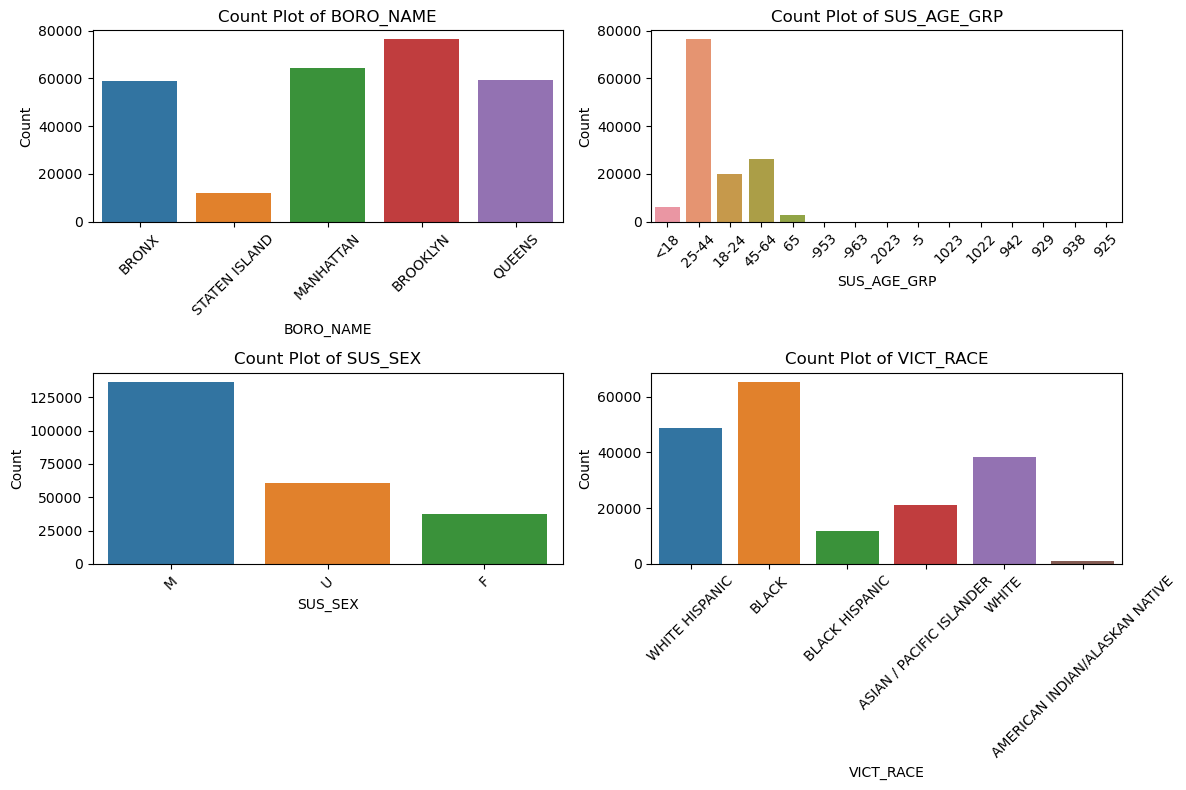

In [84]:
selected_columns = ['BORO_NAME', 'SUS_AGE_GRP', 'SUS_SEX', 'VICT_RACE']

plt.figure(figsize=(12, 8))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data1, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-labels for better readability

plt.tight_layout()
plt.show()

In [ ]:
# In Ln[84] above, visual representation shows that most complaints came from Brooklyn
#  Suspect sex was predominantly male of age ranging from 25-44.
# Most of the victims were Black.

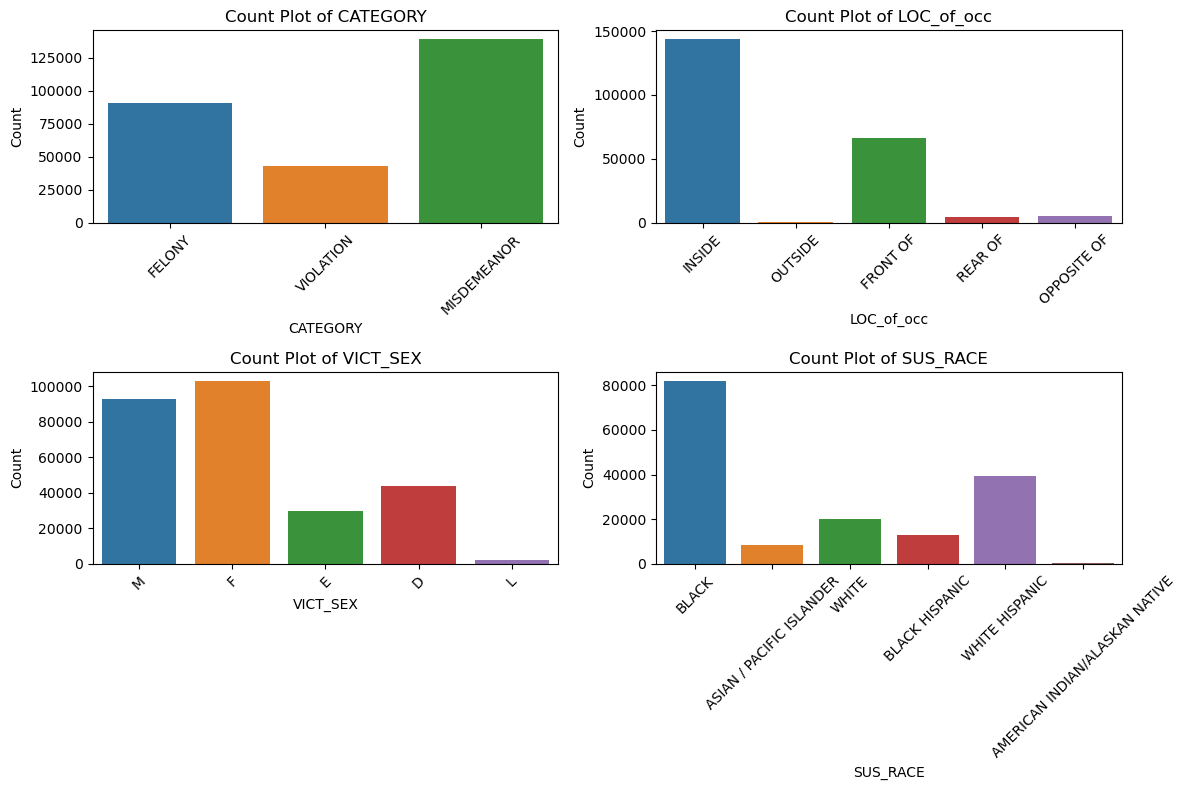

In [81]:
selected_columns = ['CATEGORY', 'LOC_of_occ', 'VICT_SEX', 'SUS_RACE']

plt.figure(figsize=(12, 8))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data1, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-labels for better readability

plt.tight_layout()
plt.show()

In [ ]:
# Ln[81] above shows misdemeanor as the frequent crime category followed by felony.
# Location of occurence can be seen to be largely inside.
# Victim sex show more females than males were attacked, but the difference is suspect as there are unidentified labels that could shed more light on this.
# Suspect sex has Black as the. most implicated race followed by white hispanics.

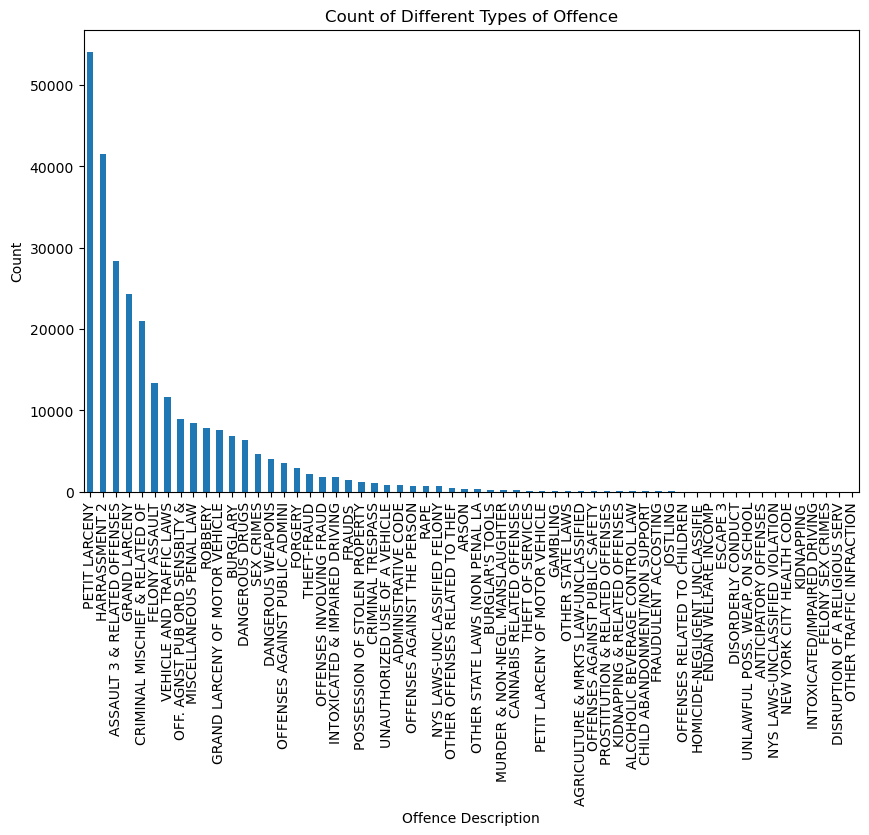

In [67]:
plt.figure(figsize=(10, 6))
data1['off_desc'].value_counts().plot(kind='bar')
plt.title('Count of Different Types of Offence')
plt.xlabel('Offence Description')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-labels for better readability
plt.show()

In [ ]:
# For ln[67], petit larceny was the most reported offence.

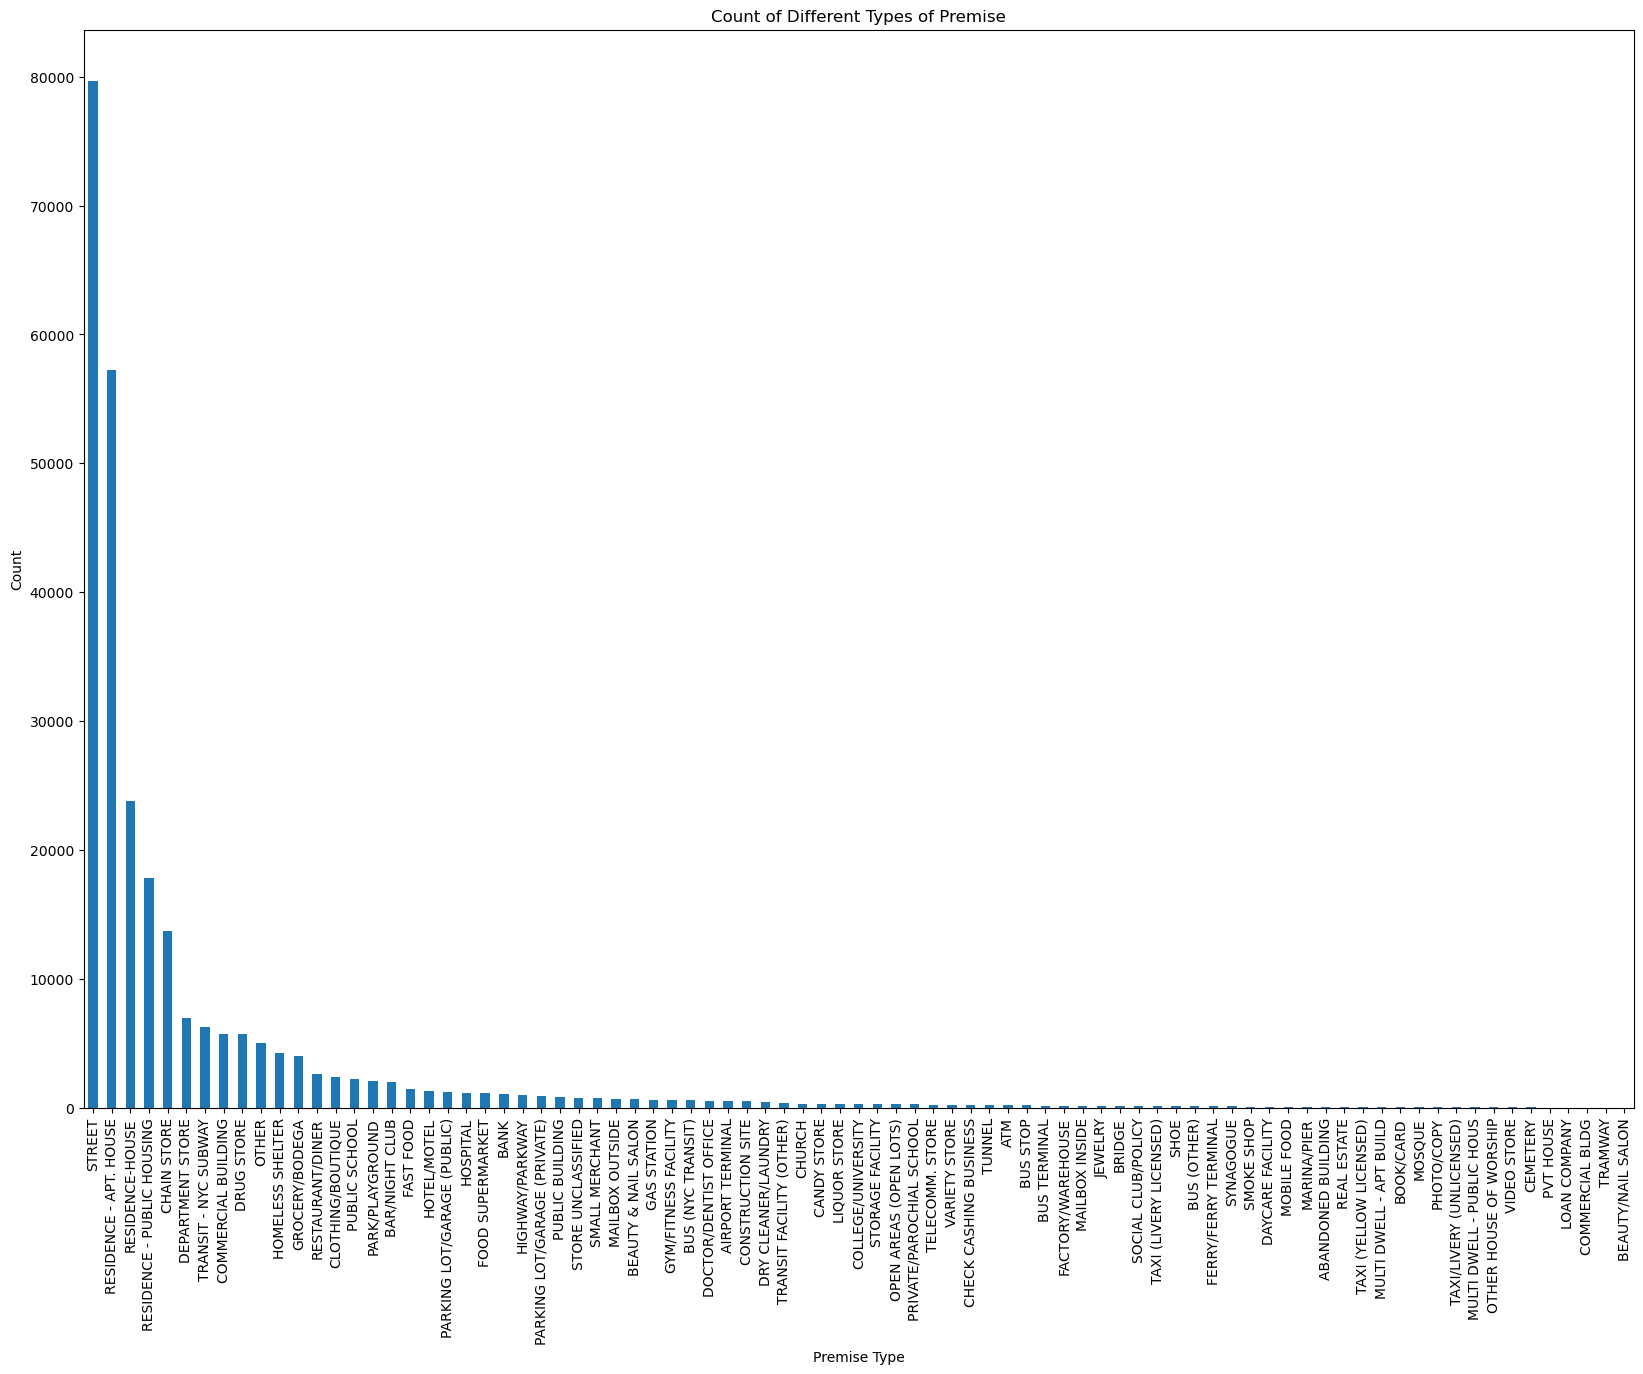

In [95]:
plt.figure(figsize=(20, 14))
data1['PT'].value_counts().plot(kind='bar')
plt.title('Count of Different Types of Premise')
plt.xlabel('Premise Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-labels for better readability
plt.show()

In [ ]:
#  Type of premise plot shows that most crimes occured in the streets. This brings to suspect
#  the earlier finding that showed that the highest location of occurence was 'inside'.

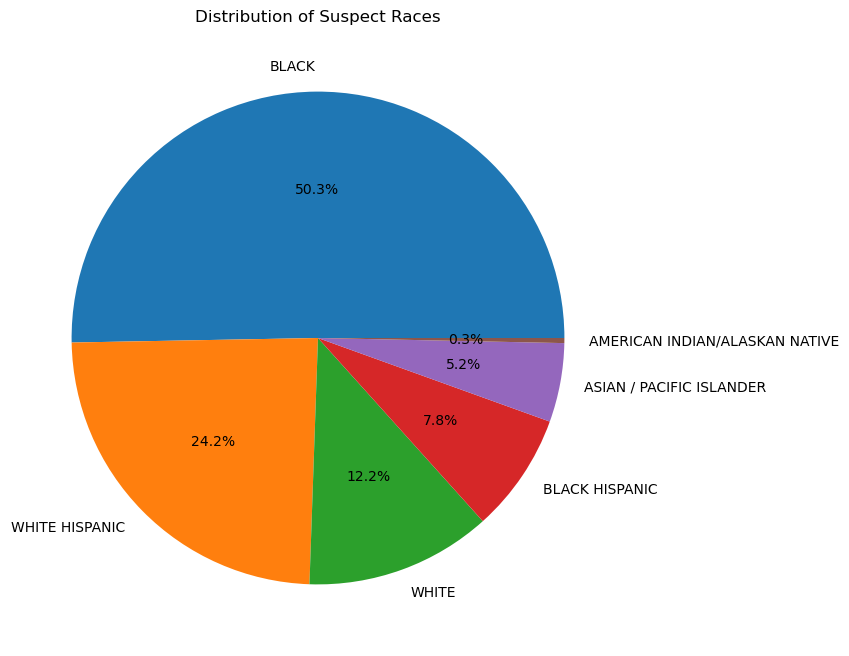

In [68]:
plt.figure(figsize=(8, 8))
data1['SUS_RACE'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Suspect Races')
plt.ylabel('')
plt.show()

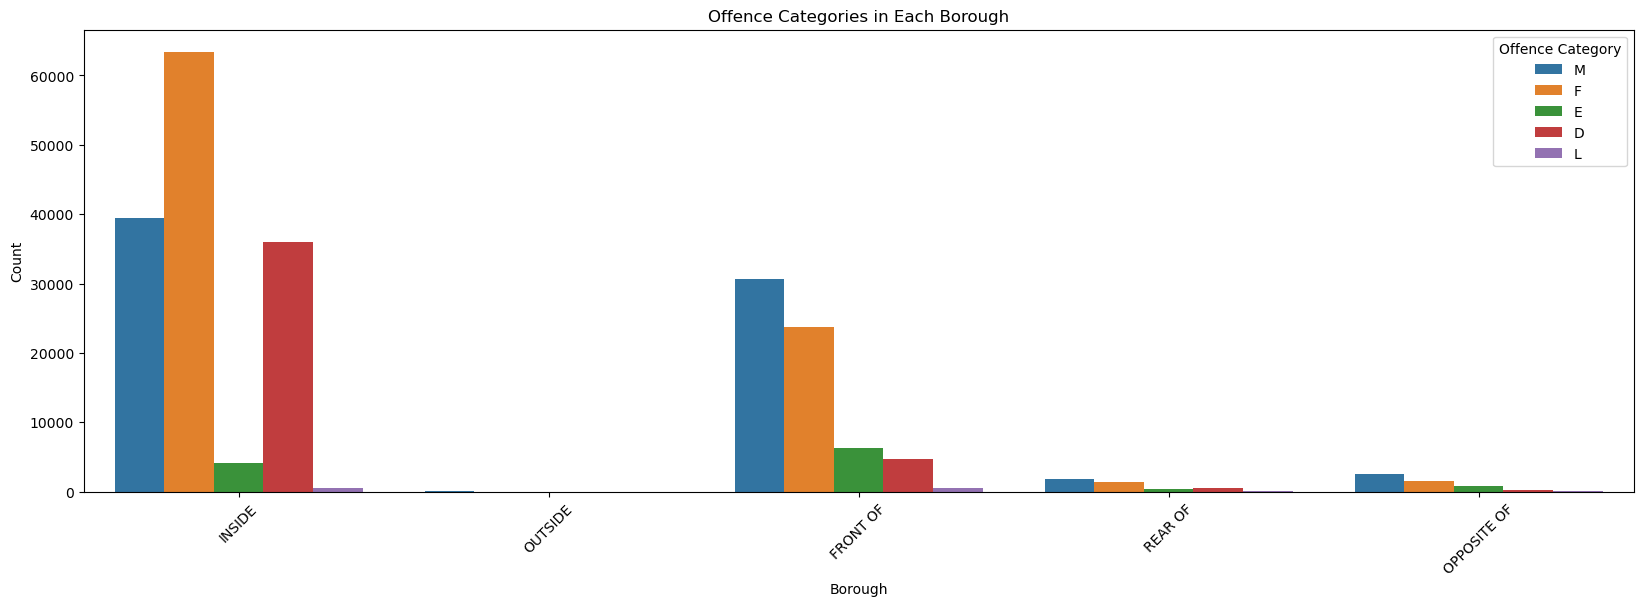

In [96]:
plt.figure(figsize=(20, 6))
sns.countplot(data=data1, x='LOC_of_occ', hue='VICT_SEX')
plt.title('Offence Categories in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.legend(title='Offence Category')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.show()

In [ ]:
# Plot of location of occurrence against victim's sex shows that most crimes occured inside.

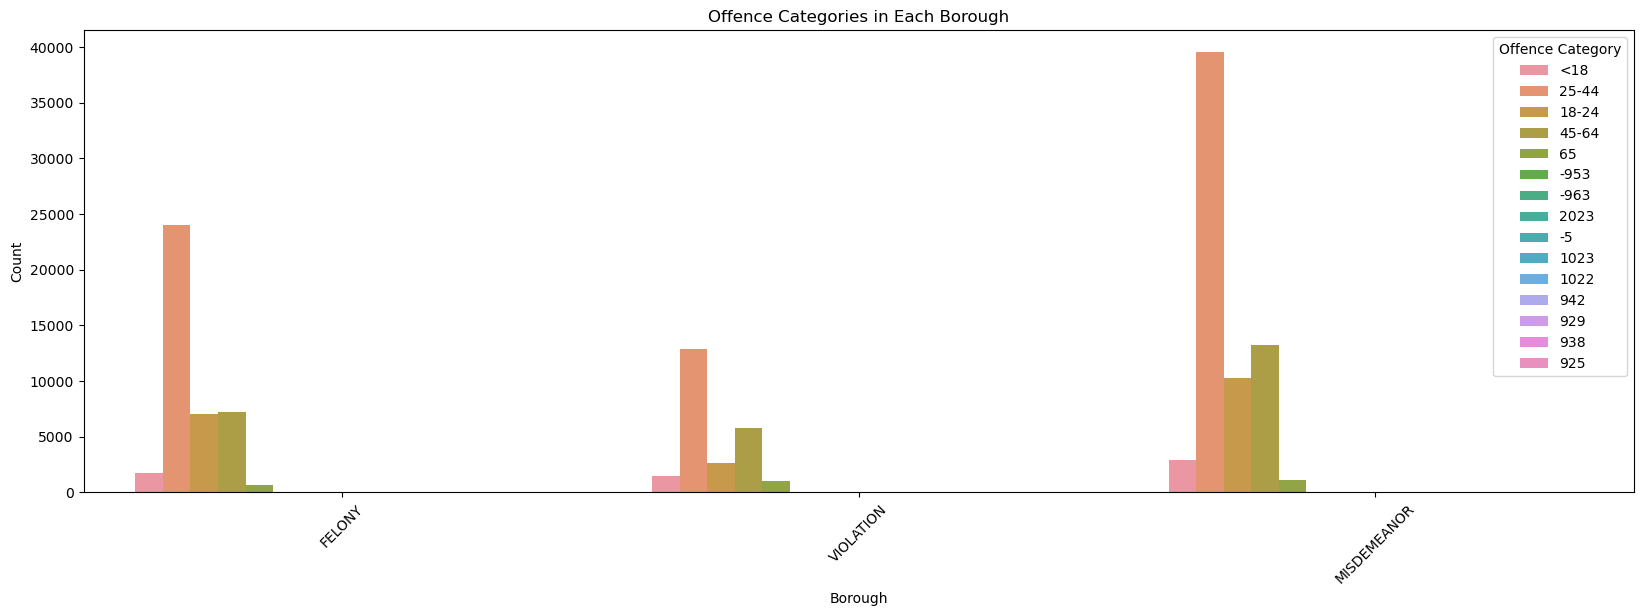

In [78]:
plt.figure(figsize=(20, 6))
sns.countplot(data=data1, x='CATEGORY', hue='SUS_AGE_GRP')
plt.title('Offence Categories in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.legend(title='Offence Category')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.show()

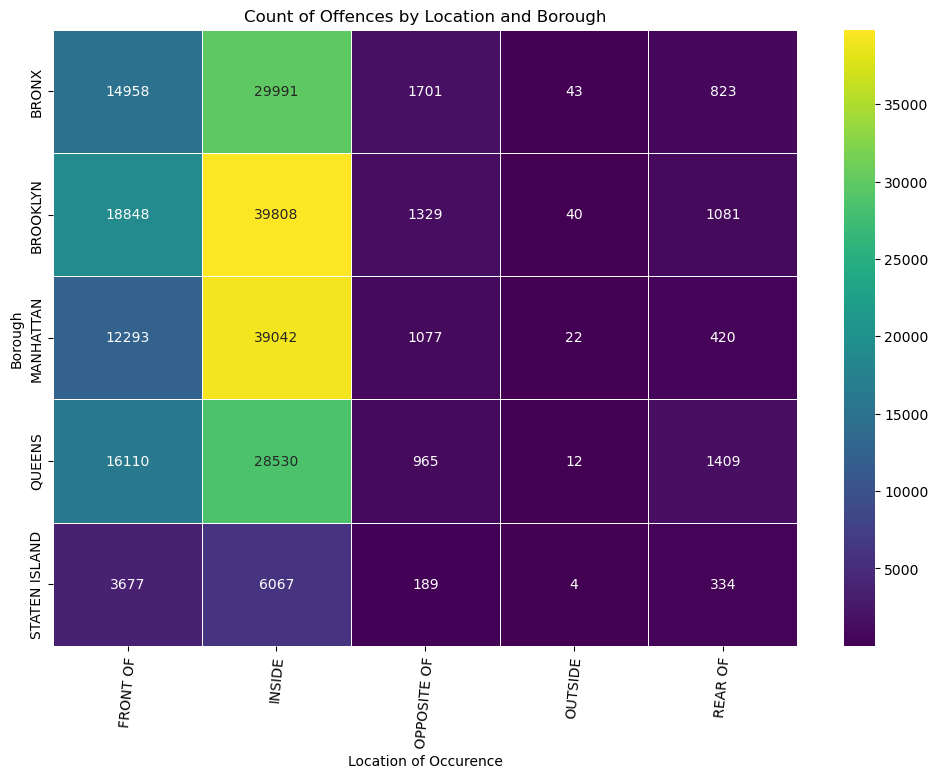

In [91]:
heatmap_data = data1.groupby(['BORO_NAME', 'LOC_of_occ']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=0.5)
plt.title('Count of Offences by Location and Borough')
plt.xlabel('Location of Occurence')
plt.ylabel('Borough')
plt.xticks(rotation=85)  # Rotate x-labels for better readability
plt.show()

In [ ]:
# The above heatmap shows that most crimes occured inside with Brooklyn having the highest complaints and Staten Island with the lowest.

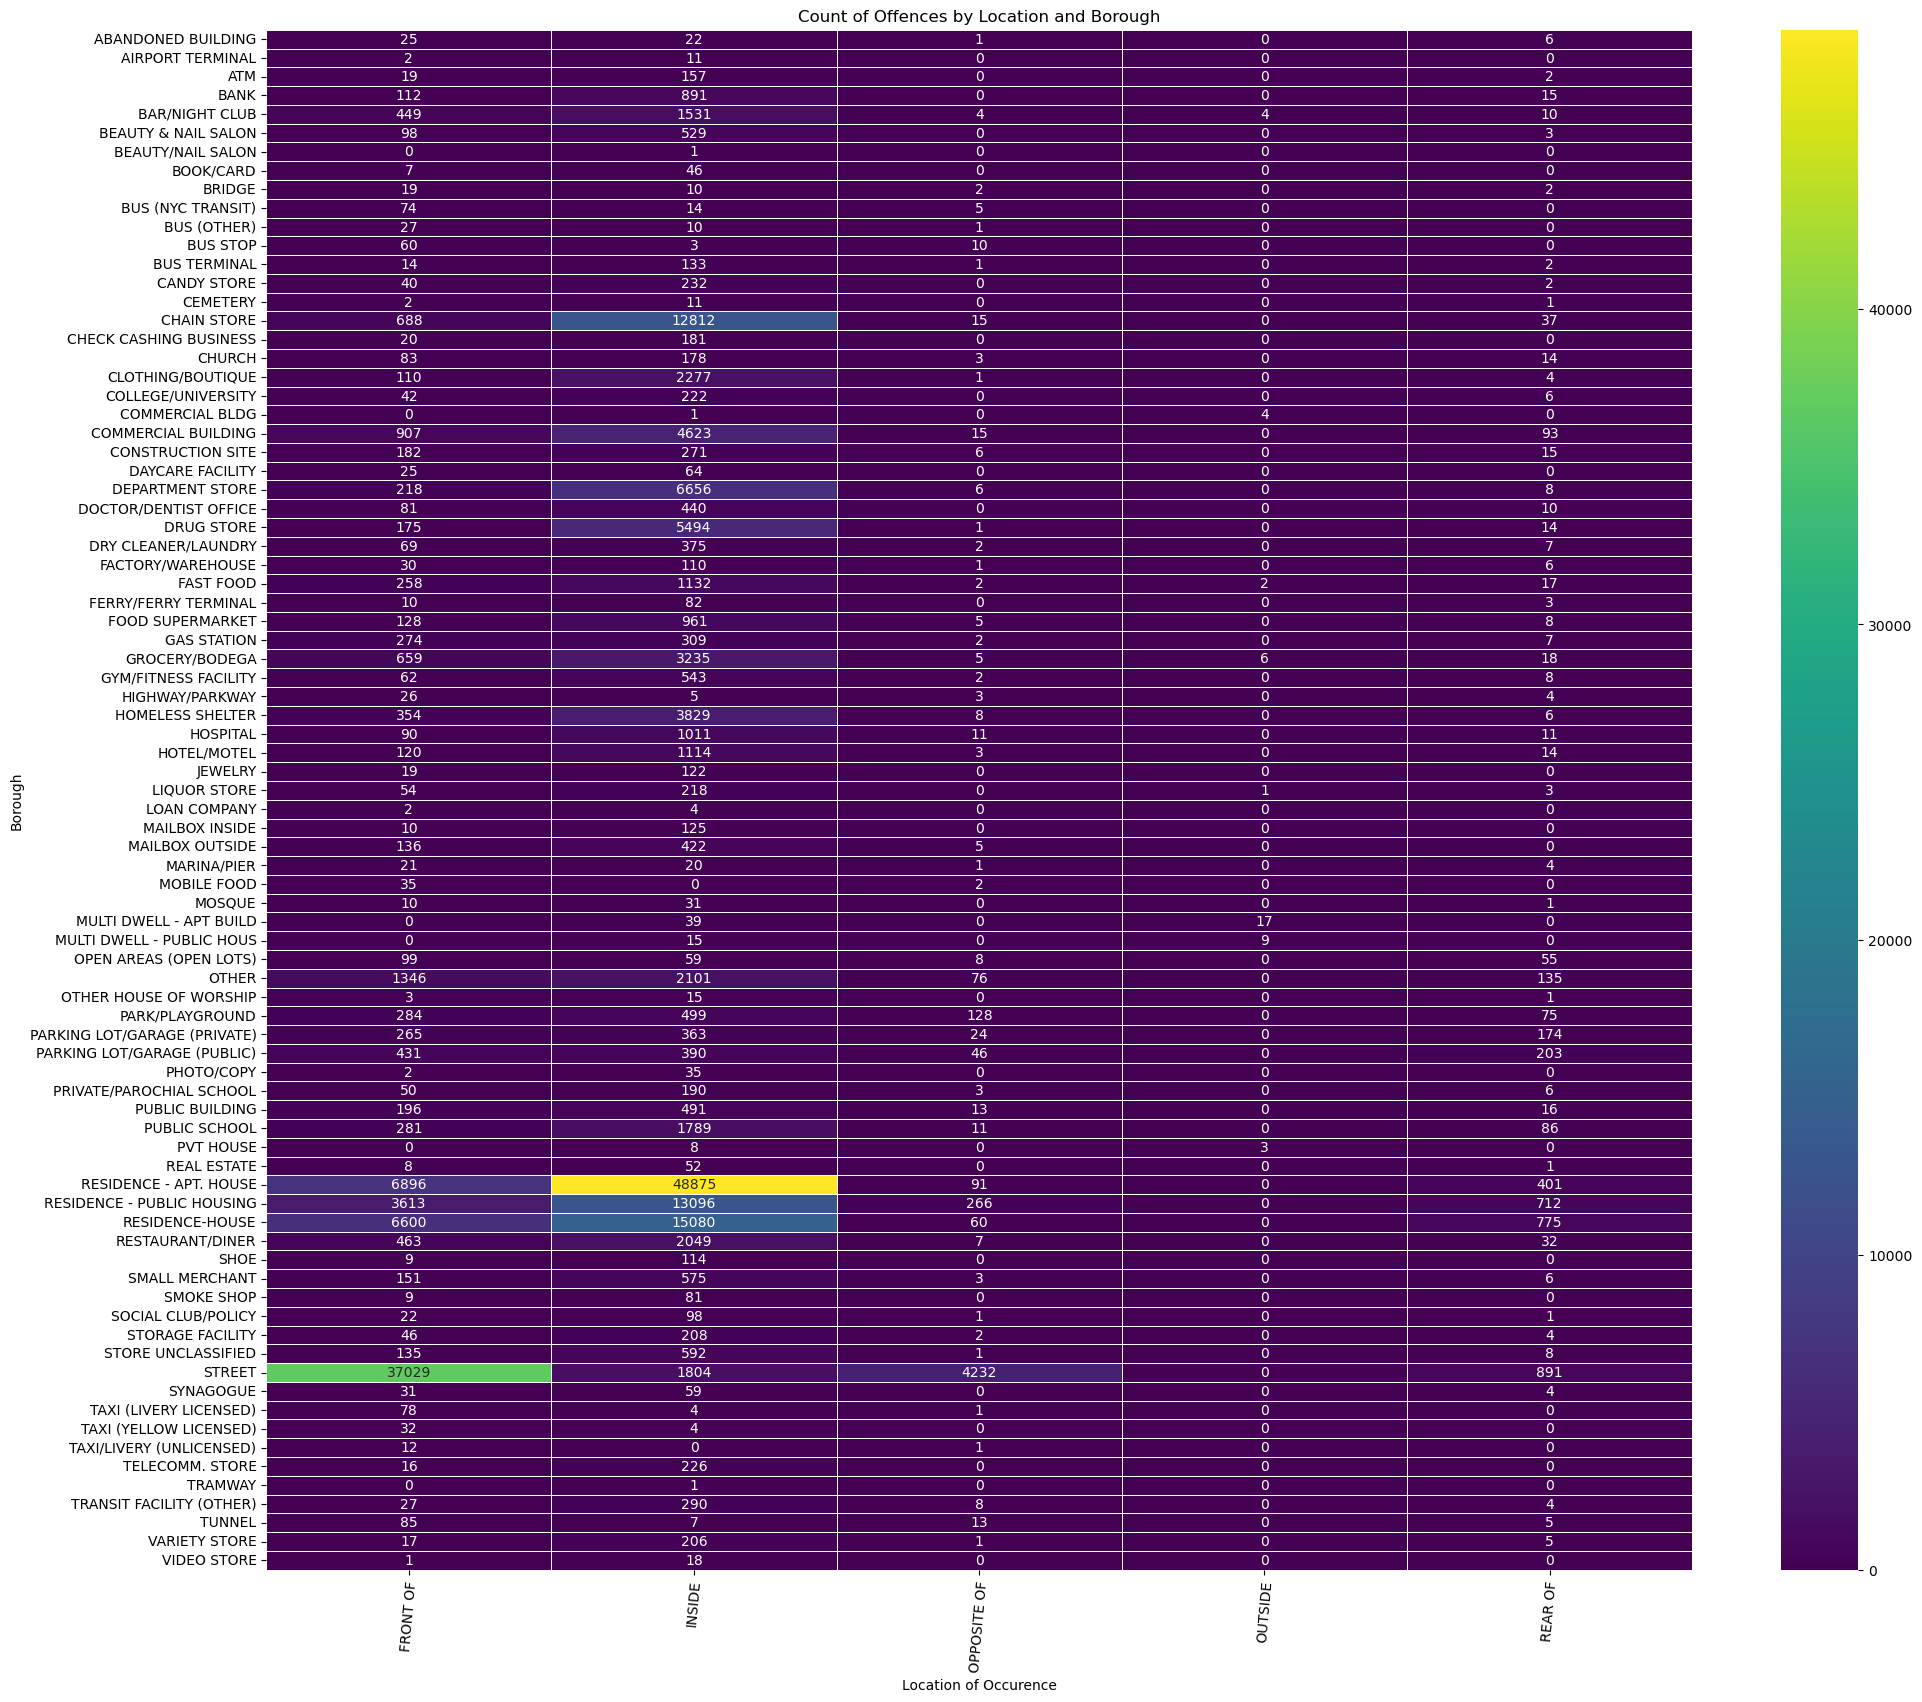

In [106]:
heatmap_data = data1.groupby(['PT', 'LOC_of_occ']).size().unstack(fill_value=0)

plt.figure(figsize=(23, 20))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=0.5)
plt.title('Count of Offences by Location and Borough')
plt.xlabel('Location of Occurence')
plt.ylabel('Borough')
plt.xticks(rotation=85)  # Rotate x-labels for better readability
plt.show()

In [ ]:
# ln[104] shows the heatmap between Premise type and Location of occurrence. It can be deduced
# that most crimes were committed inside residence (appartments and houses 48875 times, public housing 13096, house 15080).
# 37029 can be attributed to the number of crimes that occured in the streets.